In [12]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys

sys.path.append('../')

from plain_net.PlainNet import PlainNet

In [13]:
with open('../data/duffing/train.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('../data/duffing/test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [14]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [15]:
model = PlainNet([3, 64, 64, 64, 2])

In [16]:
model.train_n_epochs(train_loader=train_loader, n_epochs=10, lr=0.001, verbose=True)

Epoch 0: loss 0.25851282477378845


In [17]:
y_pred = model(test_data.x).detach().numpy()

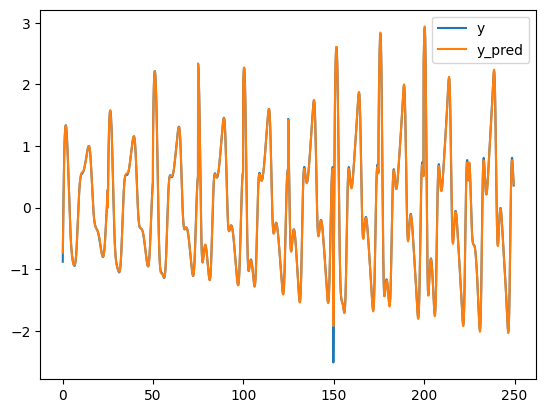

In [18]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [19]:
for layer in model.layers:
    print(layer.weight.data)

tensor([[-3.8463e-01,  2.9920e-02, -3.4611e-01],
        [-2.2279e-01,  5.2015e-01,  1.1687e-01],
        [ 1.7675e-02, -3.3851e-02, -4.0438e-01],
        [ 3.1964e-01,  5.3383e-01, -3.8279e-01],
        [-3.6313e-01,  8.0117e-02,  2.9991e-02],
        [-3.1671e-01,  3.8207e-01, -2.3483e-01],
        [ 2.9832e-01, -4.4935e-01,  1.1678e-01],
        [ 3.2560e-01, -4.9068e-01, -2.4282e-02],
        [-6.3813e-01,  5.4877e-02, -2.8813e-01],
        [-3.7050e-01,  4.6795e-01,  6.2308e-01],
        [ 5.6554e-01,  7.8902e-02, -1.8915e-01],
        [ 5.3888e-01, -5.2147e-01, -1.8896e-01],
        [-4.5404e-01,  5.2379e-01,  1.4015e-01],
        [-2.3462e-01,  5.6974e-01, -2.0955e-01],
        [ 6.2277e-01,  3.9385e-01,  1.0467e-01],
        [-4.0876e-01, -5.8913e-01, -3.9587e-01],
        [ 2.3124e-01,  2.2513e-01, -2.0784e-01],
        [ 2.6130e-01,  4.8465e-01,  1.1140e-01],
        [-2.3277e-01, -4.3185e-01, -1.9187e-01],
        [ 6.1724e-03, -3.2151e-01,  5.8699e-01],
        [-5.1252e-01

In [20]:
torch.save(model.state_dict(), f"../models/alu/soft_thresholding/model_.pickle")